<a href="https://colab.research.google.com/github/jkcg-learning/HeartDiseasePrediction_XAI/blob/main/Jyothish_Kumar_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explaining Machine Learning Models using SHAP** (SHapley Additive exPlanations)

https://shap.readthedocs.io/en/latest/



**Heart Disease Prediction**

Predict if a heart disease is present or not

https://dphi.tech/practice/challenge/51

*Data Description*


* age: Age in years
* sex: 1 = male, 0 = female
* cp: Chest pain type
* trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: Resting electrocardiographic results
* thalach: Maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-4) colored by fluoroscopy
* thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
* target: 1 = Heart disease present, 0 = Heart disease not present

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the train data

heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [3]:


print(f'\nTrain contains {heart_data.shape[0]} samples and {heart_data.shape[1]} variables')


Train contains 212 samples and 14 variables


In [4]:
#loading the test data

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
print(f'\nTest contains {test_data.shape[0]} samples and {test_data.shape[1]} variables')


Test contains 91 samples and 13 variables


In [5]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   48    1   2       124   255    1  ...      0      0.0      2   2     2       1
1   68    0   2       120   211    0  ...      0      1.5      1   0     2       1
2   46    1   0       120   249    0  ...      0      0.8      2   0     3       0
3   60    1   0       130   253    0  ...      1      1.4      2   1     3       0
4   43    1   0       115   303    0  ...      0      1.2      1   0     2       1

[5 rows x 14 columns]

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [7]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
TARGET_COL = 'target'

In [10]:
heart_data[TARGET_COL].value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


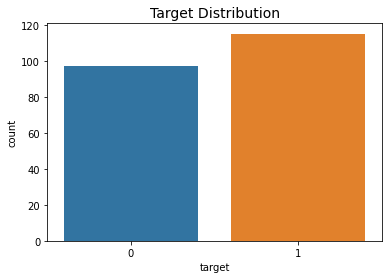

In [11]:
_ = sns.countplot(heart_data[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [12]:

heart_data.nunique()

age          40
sex           2
cp            4
trestbps     46
chol        134
fbs           2
restecg       3
thalach      82
exang         2
oldpeak      36
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
 cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [14]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']

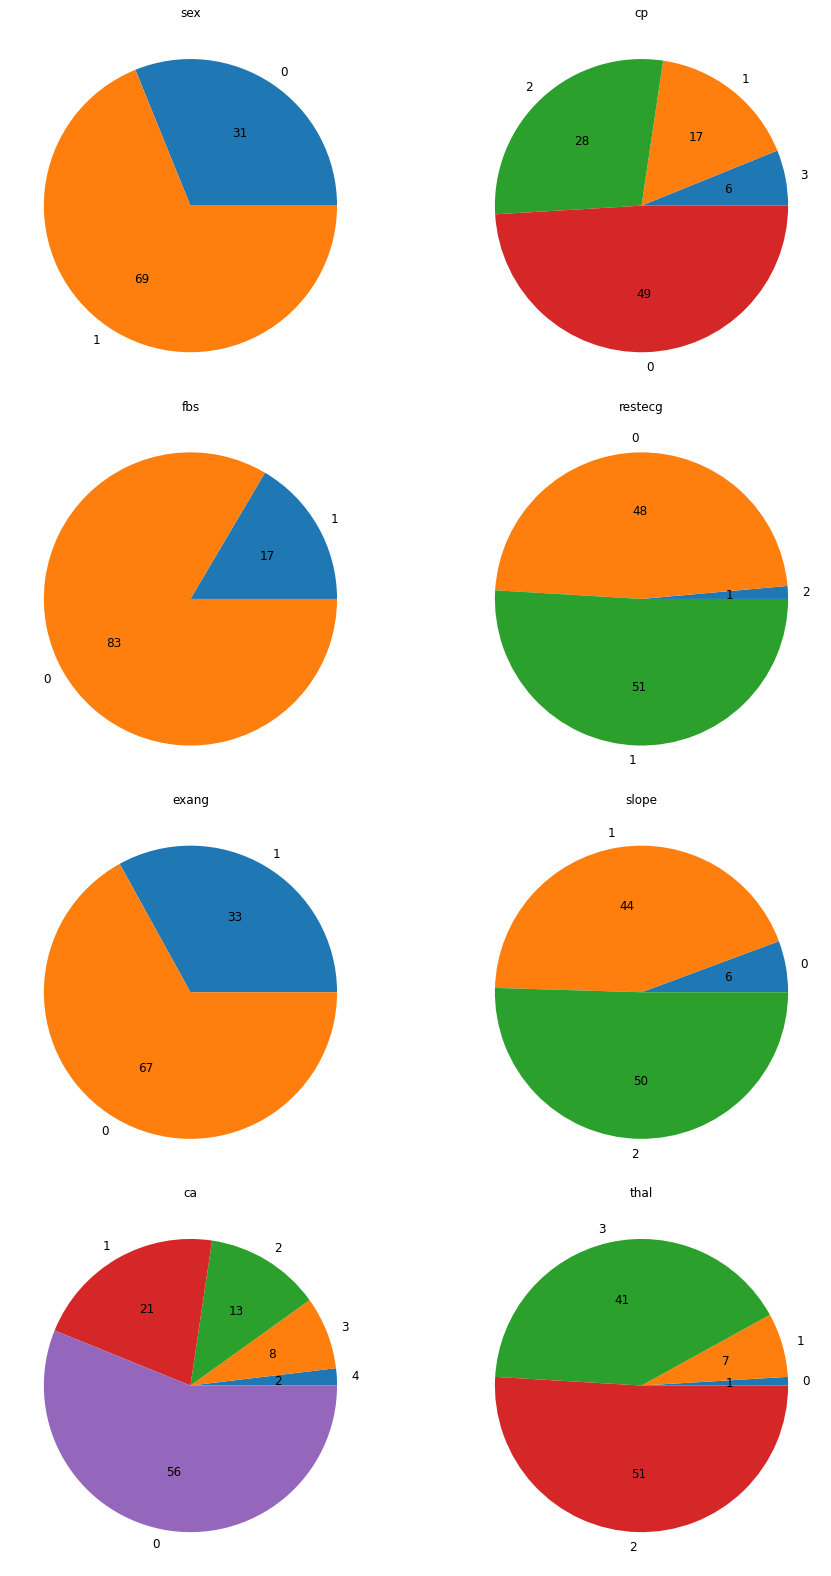

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

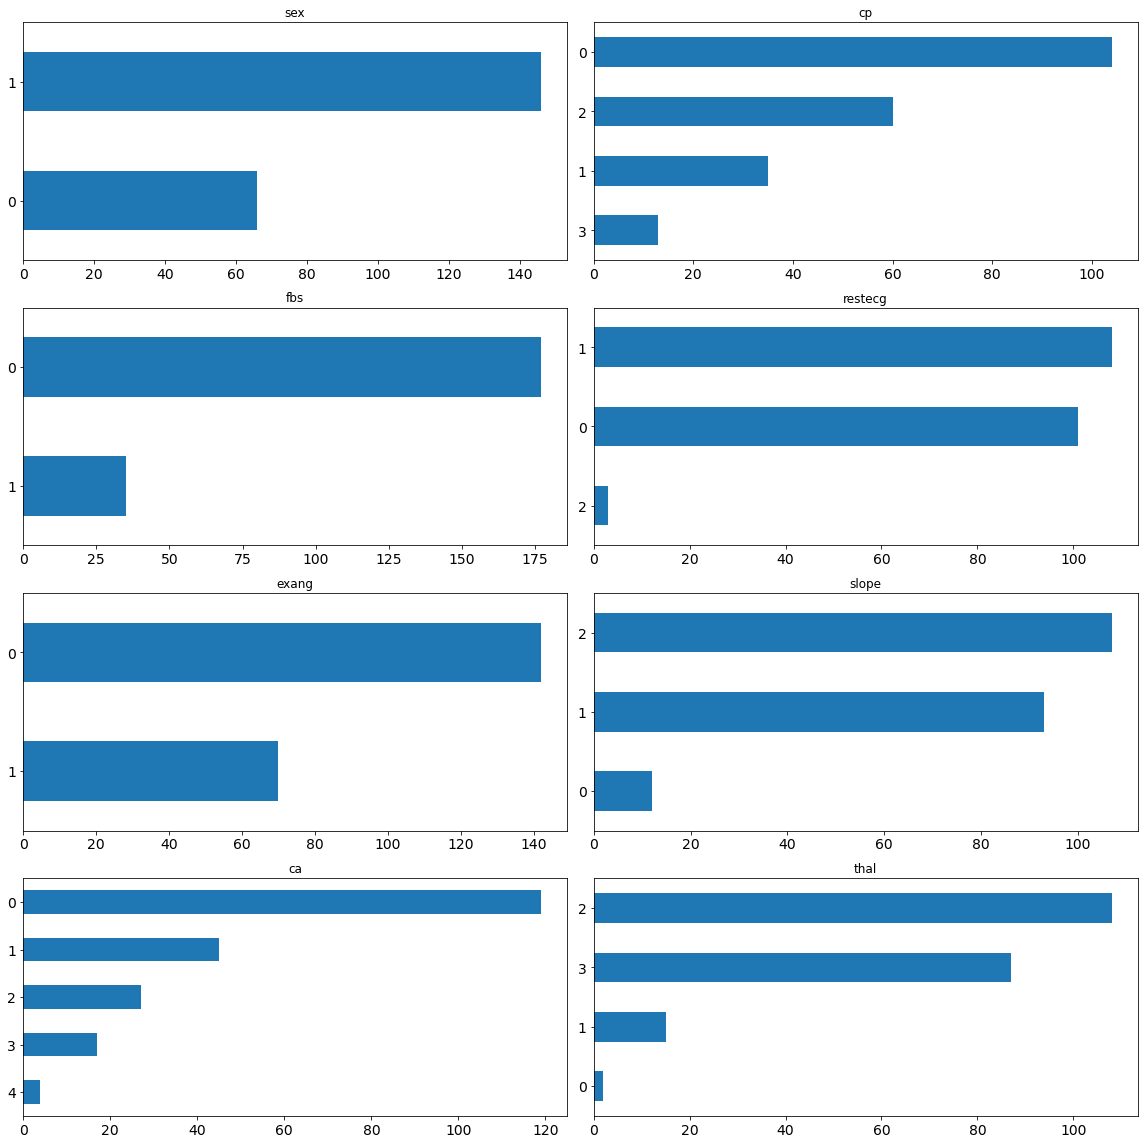

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

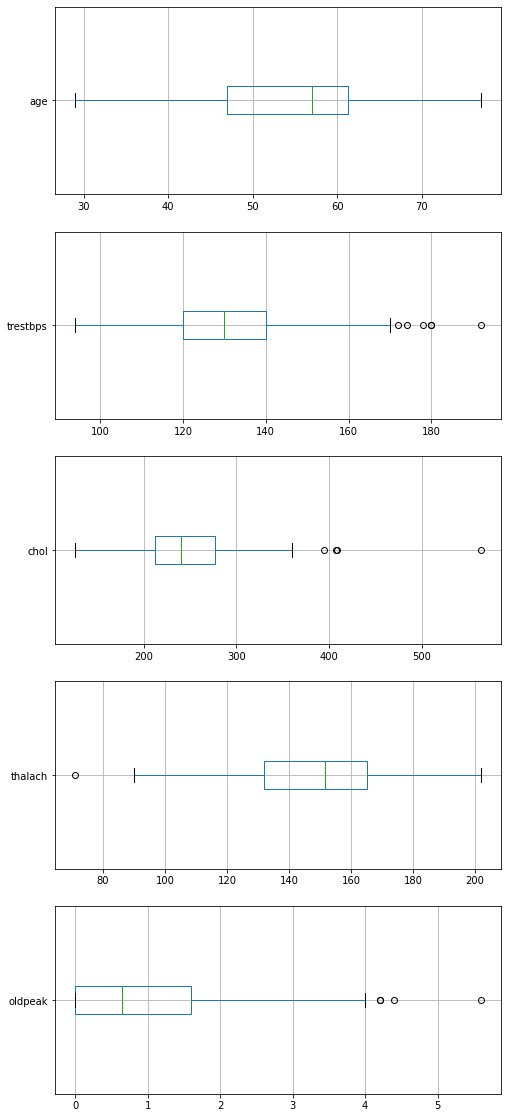

In [17]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = heart_data[[c]].boxplot(ax=axes[i], vert=False)

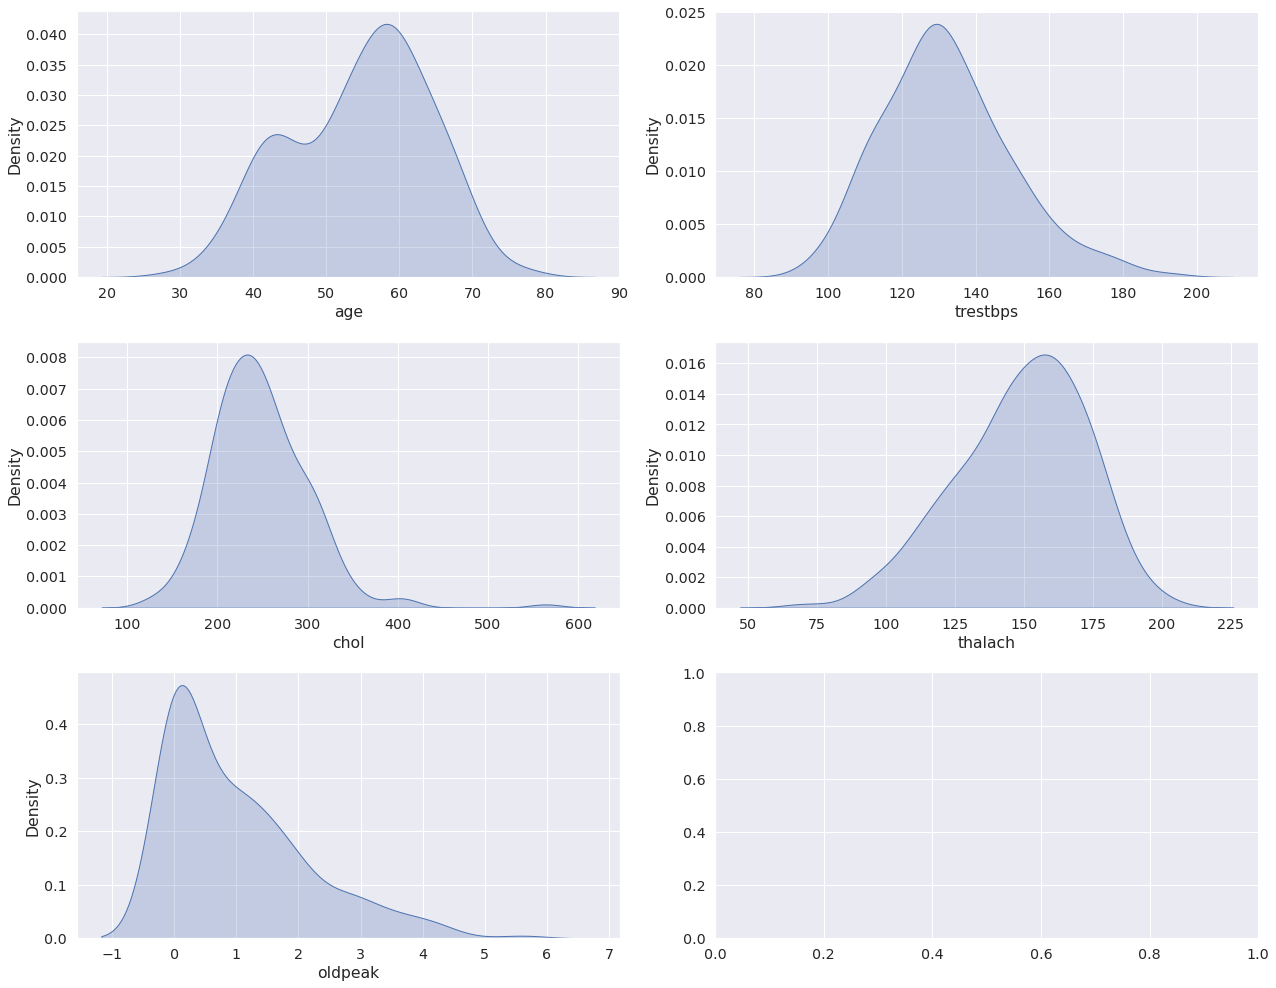

In [18]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

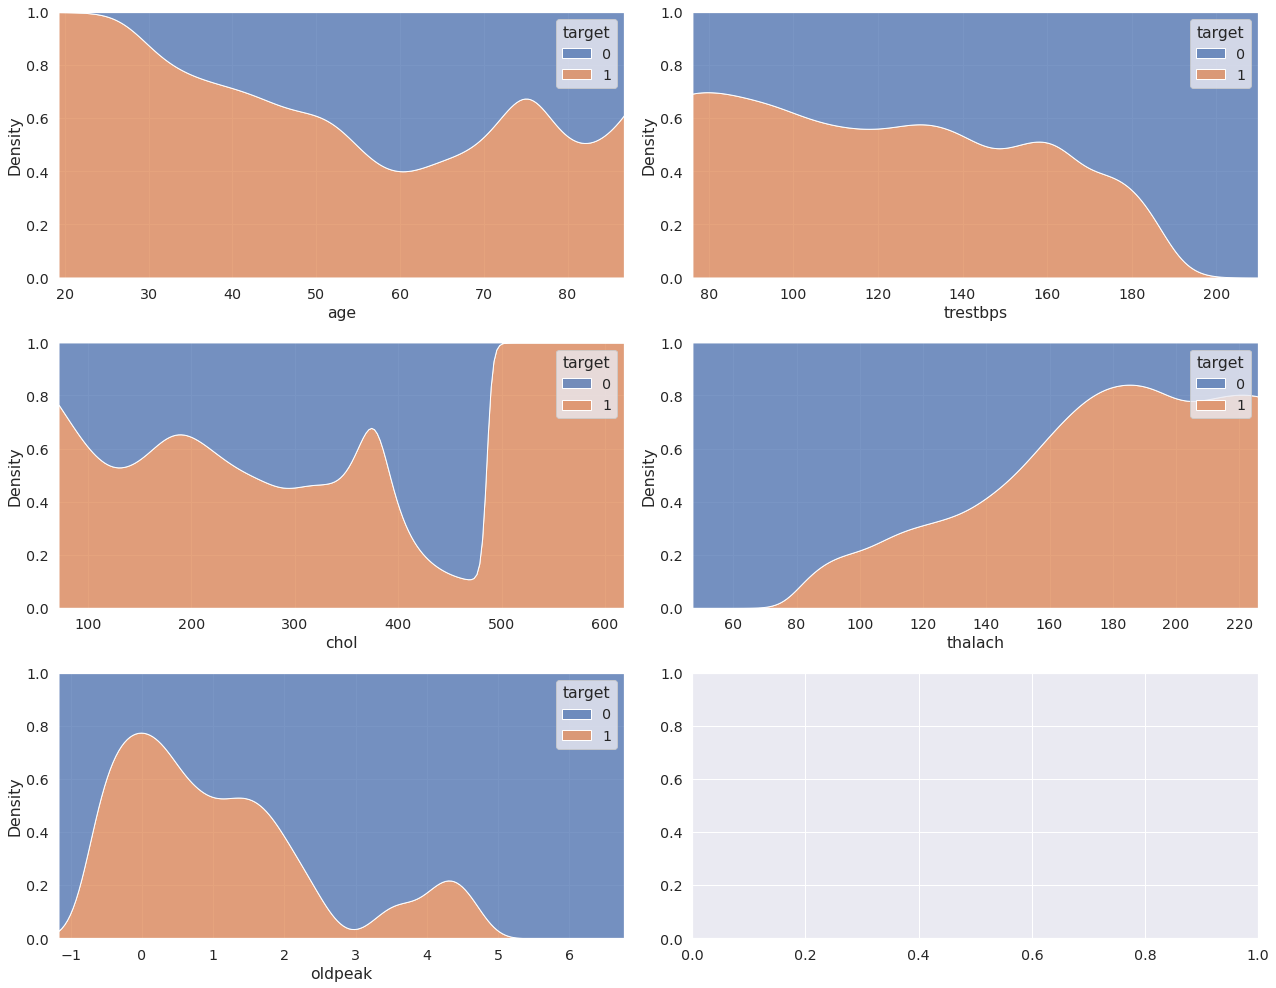

In [19]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

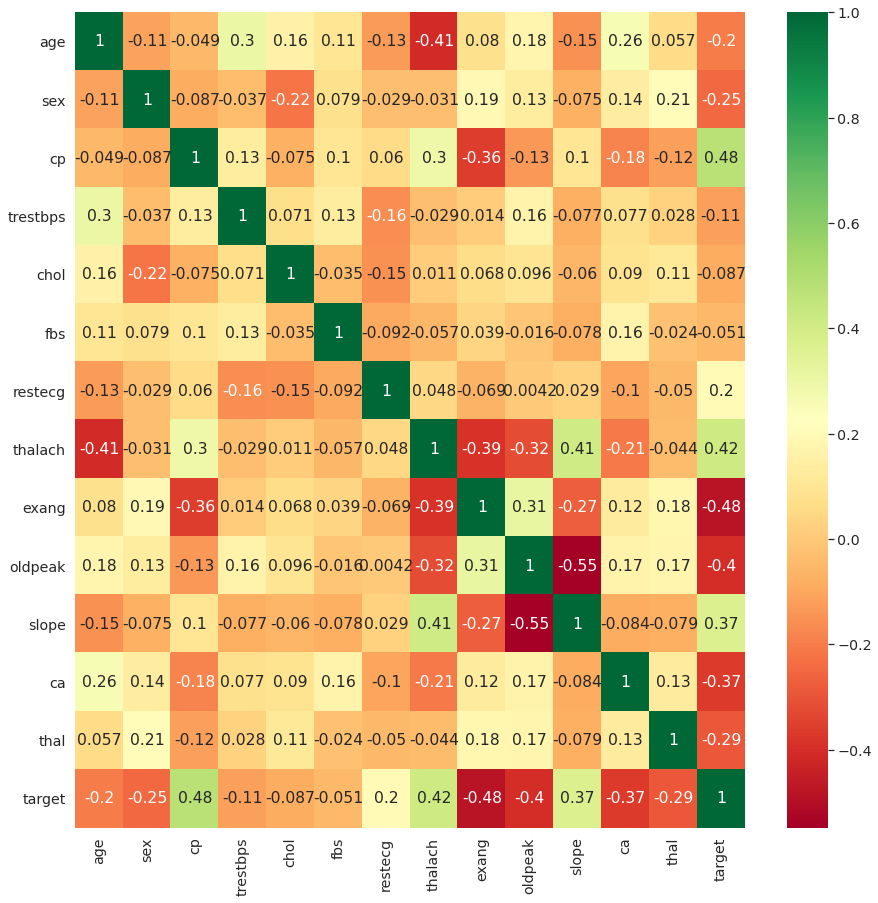

In [20]:
plt.figure(figsize=(15, 15))
_ = sns.heatmap(heart_data.corr(), annot=True,cmap="RdYlGn")

In [21]:
df = pd.concat([heart_data, test_data], axis=0).reset_index(drop = True)
df.shape

(303, 14)

In [22]:
df = pd.get_dummies(df, columns = cat_cols)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
train_proc, test_proc = df[:heart_data.shape[0]], df[heart_data.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [TARGET_COL]]

In [25]:

len(features)

30

In [26]:
train_proc

age  trestbps      chol   thalach  ...  thal_0  thal_1  thal_2  thal_3
0   -0.702136 -0.435415  0.168827  1.108705  ...       0       0       1       0
1    1.503641 -0.663867 -0.681494 -1.515125  ...       0       0       1       0
2   -0.922713 -0.663867  0.052874 -0.246940  ...       0       0       0       1
3    0.621330 -0.092738  0.130176 -0.246940  ...       0       0       0       1
4   -1.253580 -0.949431  1.096450  1.371088  ...       0       0       1       0
..        ...       ...       ...       ...  ...     ...     ...     ...     ...
207  1.393352 -0.663867 -0.333636 -0.902898  ...       0       0       0       1
208  0.400752  1.049520  0.709940  0.540209  ...       0       0       1       0
209  0.621330  0.763956  0.690615 -0.334401  ...       0       0       0       1
210  0.841908 -0.435415 -0.720145  0.583939  ...       0       0       1       0
211  0.400752  2.191778 -0.410938 -0.159479  ...       0       1       0       0

[212 rows x 31 columns]

In [27]:
test_proc

age  trestbps      chol   thalach  ...  thal_0  thal_1  thal_2  thal_3
0  -0.922713  0.364165 -0.063079  0.102904  ...       0       0       1       0
1  -1.033002  0.364165 -0.198357  0.102904  ...       0       0       1       0
2   0.511041  1.620649  0.516686 -1.077820  ...       0       0       1       0
3  -1.143291 -1.349222 -2.034278  1.108705  ...       0       0       1       0
4  -0.812425 -1.349222 -0.063079  0.102904  ...       0       0       1       0
..       ...       ...       ...       ...  ...     ...     ...     ...     ...
86 -0.371269  0.478391  0.284780  1.589741  ...       0       0       1       0
87 -1.363869  0.935294 -0.043753  1.239897  ...       0       0       1       0
88  0.180175 -0.663867 -0.121055  0.846322  ...       0       0       1       0
89  1.062485  2.762907  1.521611  0.190365  ...       0       0       1       0
90  0.400752 -0.663867  1.811493  0.977514  ...       0       0       1       0

[91 rows x 31 columns]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [29]:
trn, val = train_test_split(train_proc,test_size=0.2, random_state = 0, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
train_features, validation_features = trn[features], val[features]

###### Output of our model will be the TARGET_COL
train_target, validation_target = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
test_features = test_proc[features]


In [30]:
scaler = StandardScaler()
_ = scaler.fit(train_features)

train_features_scaled = scaler.transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
#X_test = scaler.transform(X_test)

In [31]:
model_1_lr = LogisticRegression(random_state = 1, max_iter = 100)
_ = model_1_lr.fit(train_features, train_target)

In [32]:
print("Model intercept  : ", model_1_lr.intercept_, "\n")
print("Model coefficient: ", model_1_lr.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_1_lr.coef_[0][i])

Model intercept  :  [0.226638] 

Model coefficient:  [[ 0.20159359 -0.37184733 -0.06256496  0.29257736 -0.30131343  0.34221801
  -0.34227108 -1.38820604 -0.16132072  0.83587118  0.71360251 -0.00191369
   0.00186062 -0.44531528  0.45668486 -0.01142265  0.49444389 -0.49449696
   0.13894537 -0.76368132  0.62468289  1.08720148 -0.44674741 -1.00471267
  -0.17330442  0.53750995  0.04221806  0.28986661  0.59996069 -0.93209844]] 

age :  0.20159358604331107
trestbps :  -0.37184732918237856
chol :  -0.06256495625000864
thalach :  0.29257736052359606
oldpeak :  -0.30131342679199685
sex_0 :  0.34221800706646555
sex_1 :  -0.34227107877220053
cp_0 :  -1.3882060373180996
cp_1 :  -0.16132072314637685
cp_2 :  0.835871177930825
cp_3 :  0.7136025108279156
fbs_0 :  -0.0019136944720316408
fbs_1 :  0.0018606227662966287
restecg_0 :  -0.44531528249113567
restecg_1 :  0.45668486313371576
restecg_2 :  -0.011422652348315352
exang_0 :  0.49444388628864383
exang_1 :  -0.4944969579943794
slope_0 :  0.138945366893

In [33]:
preds_train = model_1_lr.predict(train_features)
preds_val = model_1_lr.predict(validation_features)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8864864864864864
F1 Score on Validation Data:  0.8444444444444444


In [34]:
model_2_XGB = XGBClassifier(n_estimators = 15,
                    max_depth = 6,
                    learning_rate = 0.01,
                    colsample_bytree = 0.05,
                    random_state=0,
                    )

_ = model_2_XGB.fit(train_features, train_target)


In [35]:
preds_train = model_2_XGB.predict(train_features)
preds_val = model_2_XGB.predict(validation_features)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8461538461538461
F1 Score on Validation Data:  0.8301886792452831


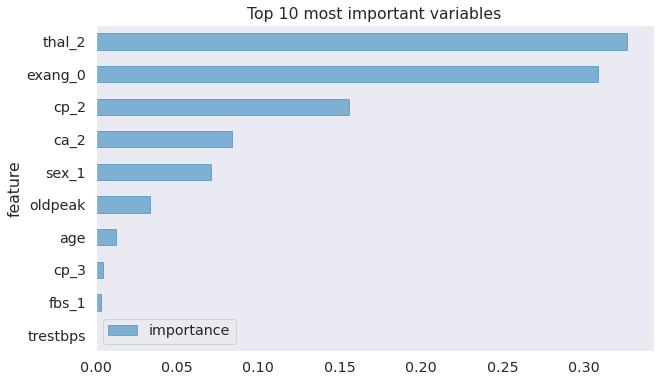

In [36]:
feature_importances_data = []
features = train_features.columns
for feature_name, feature_importance in zip(features, model_2_XGB.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

In [37]:

!pip install shap

In [38]:
import shap
# creating an explainer for our model
explainer_lr = shap.LinearExplainer(model_1_lr,train_features,feature_perturbation="interventional")

# finding out the shap values using the explainer
shap_values_lr = explainer_lr.shap_values(validation_features)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_lr.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_lr,columns=validation_features.columns).head()

Expected Value: 0.36986020183862706


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


age  trestbps      chol  ...    thal_1    thal_2    thal_3
0  0.064922 -0.006159  0.009951  ... -0.023189  0.293981  0.372839
1 -0.001779  0.121265 -0.026322  ... -0.023189 -0.305980 -0.559259
2 -0.379749 -0.006159 -0.006976  ... -0.023189  0.293981  0.372839
3  0.064922  0.418587 -0.109750  ... -0.023189 -0.305980 -0.559259
4  0.042688 -0.006159 -0.014231  ...  0.266677 -0.305980  0.372839

[5 rows x 30 columns]

In [39]:
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr, validation_features)

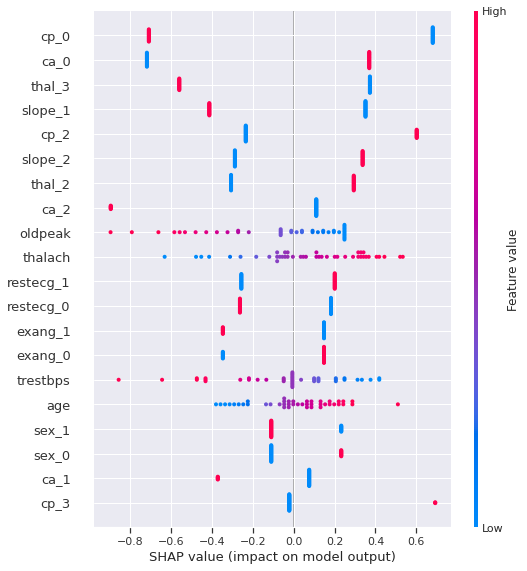

In [40]:
shap.initjs()
shap.summary_plot(shap_values_lr, validation_features)

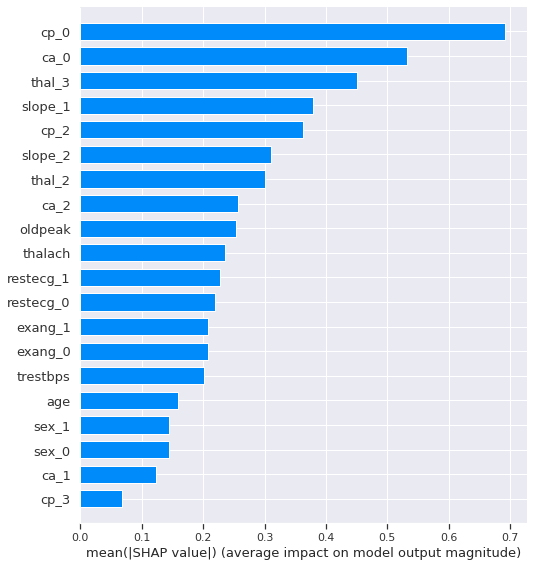

In [41]:
shap.initjs()
shap.summary_plot(shap_values_lr, validation_features, plot_type='bar')

In [58]:
print("Predicted with Heart Disease ? : ",validation_target.iloc[1].astype(int))
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[1, :], validation_features.iloc[1, :])

Predicted with Heart Disease ? :  0


In [59]:
print("Predicted with Heart Disease ? : ",validation_target.iloc[2].astype(int))
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[2, :], validation_features.iloc[2, :])


Predicted with Heart Disease ? :  1


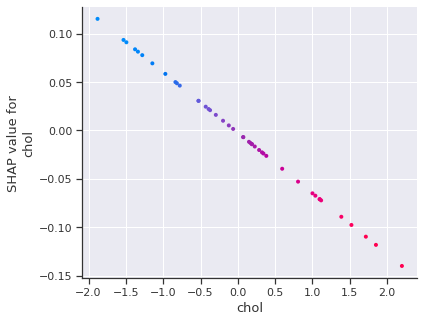

In [60]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

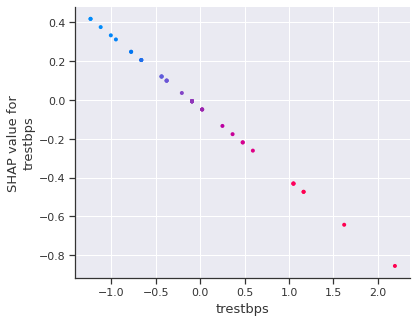

In [61]:
shap.dependence_plot(ind='trestbps', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

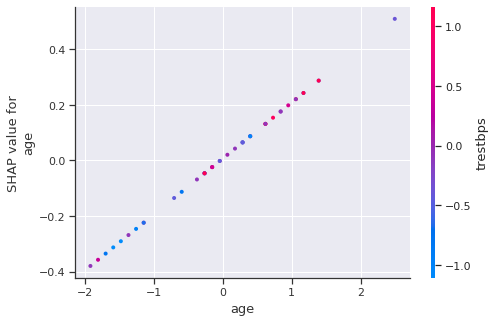

In [62]:
shap.dependence_plot(ind='age', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

In [47]:
# creating an explainer for our model
explainer_xgb = shap.TreeExplainer(model_2_XGB,train_features)

# finding out the shap values using the explainer
shap_values_xgb = explainer_xgb.shap_values(validation_features)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_xgb.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_xgb,columns=validation_features.columns).head()

Expected Value: 0.028412546695423088


age  trestbps  chol  thalach  ...  thal_0  thal_1    thal_2  thal_3
0 -0.004188       0.0   0.0      0.0  ...     0.0     0.0  0.009543     0.0
1  0.010656       0.0   0.0      0.0  ...     0.0     0.0 -0.009932     0.0
2  0.016304       0.0   0.0      0.0  ...     0.0     0.0  0.009543     0.0
3 -0.004188       0.0   0.0      0.0  ...     0.0     0.0 -0.009932     0.0
4 -0.012125       0.0   0.0      0.0  ...     0.0     0.0 -0.009932     0.0

[5 rows x 30 columns]

In [48]:
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb, validation_features)

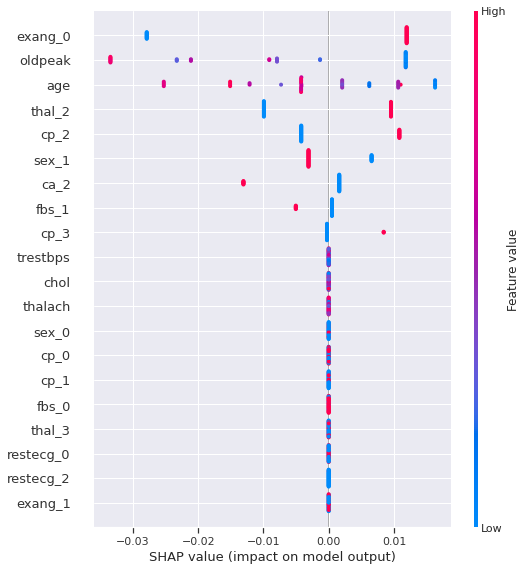

In [49]:
shap.initjs()
shap.summary_plot(shap_values_xgb, validation_features)

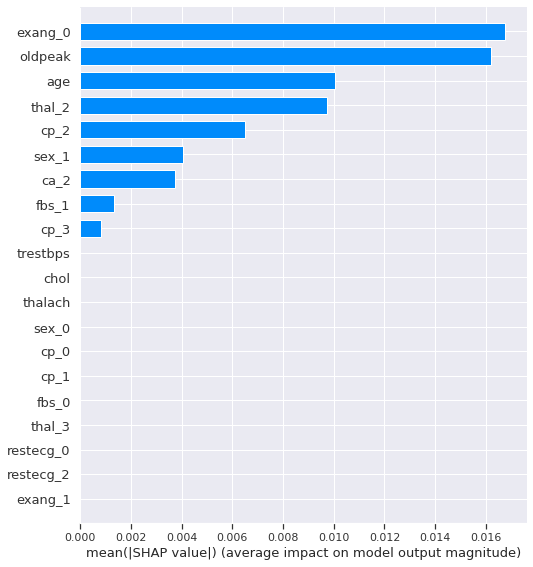

In [50]:
shap.summary_plot(shap_values_xgb, validation_features, plot_type='bar')

In [67]:
print("Predicted with Heart Disease ? : ",validation_target.iloc[6].astype(int))
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[6, :], validation_features.iloc[6, :])

Predicted with Heart Disease ? :  1


In [65]:
print("Predicted with Heart Disease ? : ",validation_target.iloc[4].astype(int))
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[4, :], validation_features.iloc[4, :])

Predicted with Heart Disease ? :  0


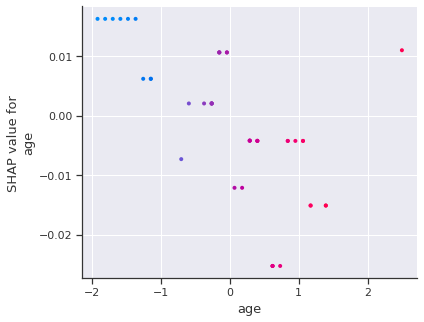

In [52]:
shap.dependence_plot(ind='age', interaction_index='age',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

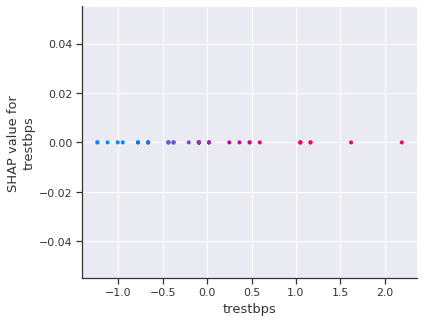

In [53]:
shap.dependence_plot(ind='trestbps', interaction_index='trestbps',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

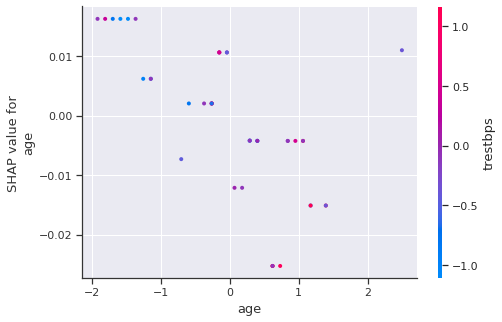

In [54]:
shap.dependence_plot(ind='age', interaction_index='trestbps',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

In [55]:
preds_test_model_1 = model_1_lr.predict(test_features).astype(int)

In [56]:
preds_test_model_2 = model_2_XGB.predict(test_features).astype(int)

In [57]:
submission_data = pd.DataFrame({'prediction':preds_test_model_2})
submission_data.to_csv('submission_12.csv', index = False)